In [1]:
%matplotlib inline

# SYDE 522 Assignment 3
## Backpropagation and Multilayer Perceptrons

### Due: Monday Nov 6 at 11:59pm

As with all the assignments in this course, this assignment is structured as a Jupyter Notebook and uses Python.  If you do not have Python and Jupyter Notebook installed, the easiest method is to download and install Anaconda https://www.anaconda.com/download.  There is a quick tutorial for running Jupyter Notebook from within Anacoda at https://docs.anaconda.com/free/anaconda/getting-started/hello-world/#python-exercise-jupyter under "Run Python in a Jupyter Notebook"

Implement your assignment directly in the Jupyter notebook and submit your resulting Jupyter Notebook file using Learn.

While you are encouraged to talk about the assignment with your classmates, you must write and submit your own assignment.  Directly copying someone else's assignment and changing a few small things here and there does not count as writing your own assignment.

Make sure to label the axes on all of your graphs.


In [1]:
import numpy as np
import sklearn.model_selection
import sklearn.neural_network

def split_data(x, y, rand=0):
    # split into training and test data
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
        x, y, test_size=0.2, shuffle=True, random_state=rand
    )
    
    return x_train, x_test, y_train, y_test

def model(x_train, y_train, m=20, n=None, rand=0):
    # initialize model
    if n is not None:
        mlp = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(m,n),    # n hidden layers with m features 
                                                  activation='relu',           # rectified linear
                                                  learning_rate_init=1e-2,     # learning rate
                                                  max_iter=1000,               # number of iterations
                                                  early_stopping=True,         # stop training if validation data gets worse
                                                  random_state=rand)           # random number seed for initialization
    else:        
        mlp = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(m,),     # n hidden layers with m features 
                                                  activation='relu',           # rectified linear
                                                  learning_rate_init=1e-2,     # learning rate
                                                  max_iter=1000,               # number of iterations
                                                  early_stopping=True,         # stop training if validation data gets worse
                                                  random_state=rand)           # random number seed for initialization
    
    # train model
    mlp.fit(x_train, y_train)

    return mlp

def plot_output(x, y, model, scaler=None):
    # create figure and axis
    plt.figure(figsize=(8, 6))
    ax = plt.gca()

    # plot labels
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title('MLP Regressor')

    # scatterplot with different colours for two categories
    plt.scatter(x[:,0], x[:,1], c=np.where(y==1, 'blue', 'red'))

    # plot output as image
    extent = (-2, 2, -2, 2)
    G = 200
    XX, YY = np.meshgrid(np.linspace(extent[2],extent[3],G), np.linspace(extent[0],extent[1],G))
    pts = np.vstack([YY.flatten(), XX.flatten()]).T
    
    # scale points if provided scaler
    if scaler is not None:
        pts = scaler.transform(pts)
        
    output_pts = mlp.predict(pts)
    
    im = plt.imshow(output_pts.reshape((G,G)).T, vmin=0, vmax=1, cmap='RdBu',
                    extent=(extent[0], extent[1], extent[3], extent[2]))

    cbar = plt.colorbar(im, ax=ax)

    plt.show()
    
def compute_rmse(actual, predicted):
    squared_diff = [(a - p)**2 for a, p in zip(actual, predicted)]
    mse = np.mean(squared_diff) # mean squared error
    rmse = np.sqrt(mse)
    
    return rmse

### Question 1

**a) [1 mark]** The following code generates the nested circles dataset that we have used in class before.

```python
x, y = sklearn.datasets.make_circles(n_samples=100, shuffle=True, noise=0.1, random_state=0, factor=0.3)
```

As before, you can split this into training and test data
```python
import sklearn.model_selection
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y, test_size=0.2, shuffle=True, random_state=0
)
```

To classify this data using a multi-layer perceptron trained using backprop, we can use the built-in implementation in `sklearn`.

```python
mlp = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(20,), # one hidden layer with 20 features 
                                          activation='relu',        # rectified linear
                                          learning_rate_init=1e-2,  # learning rate
                                          max_iter=1000,            # number of iterations
                                          early_stopping=True,      # stop training if validation data gets worse
                                          random_state=0)           # random number seed for initialization
```

To train the model, use
```python
mlp.fit(x_train, y_train)
```

To determine the outputs on your testing data `x_test`, use
```python
output = mlp.predict(x_test)
```

Train your the network using 80% of the data as training data and test it on the other 20%.  Compute the Root Mean Squared Error and report it.

In [3]:
import sklearn.datasets

# import data
x, y = sklearn.datasets.make_circles(n_samples=100, shuffle=True, noise=0.1, random_state=0, factor=0.3)

# split data
x_train, x_test, y_train, y_test = split_data(x, y)

# initialize and train model
mlp = model(x_train, y_train)

# evaluate model on test set
output = mlp.predict(x_test)

# report rmse
rmse = compute_rmse(y_test, output)
print(f"RMSE = {rmse}")

RMSE = 0.1433100772933559


**b) [1 mark]** For the model you trained in part a), plot the output for a grid of inputs between -2 and 2.  This can be done using similar code as used in the last assignment:
```python
extent = (-2, 2, -2, 2)
G = 200
XX, YY = np.meshgrid(np.linspace(extent[2],extent[3],G), np.linspace(extent[0],extent[1],G))
pts = np.vstack([YY.flatten(), XX.flatten()]).T
output_pts = mlp.predict(pts)
im = plt.imshow(output_pts.reshape((G,G)).T, vmin=0, vmax=1, cmap='RdBu',
                extent=(extent[0], extent[1], extent[3], extent[2]))
plt.scatter(x[:,0], x[:,1], c=np.where(y==1, 'blue', 'red'))
```

Has the network learned to classify the data well?

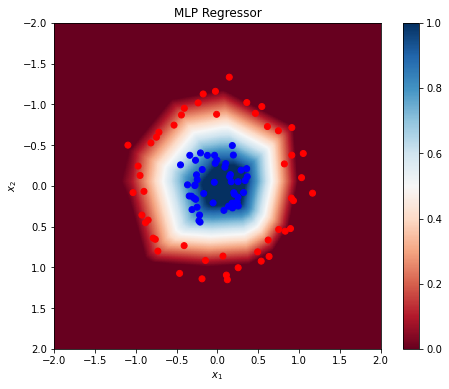

In [119]:
plot_output(x, y, mlp)

**Answer:** The network learned to classify the data relatively well, with a low RMSE and a clear margin (white band) between the two classification regions. For both classes, there is some level of uncertainty with the classifications, with probably less than half of class 0 (red) being predicted with 100% certainty. 

**c) [1 mark]** Repeat part a) but reduce the network size so that there are only 10 features (i.e. 10 neurons in the hidden layer).  Report the RMSE and generate the same plot as in part b).  Has the network learned to classify the data well?

In [120]:
# initialize and train model
mlp = model(x_train, y_train, 10)

# evaluate model on test set
output = mlp.predict(x_test)

# report rmse
rmse = compute_rmse(y_test, output)
print(f"RMSE = {rmse}")

RMSE = 0.11753224992647697


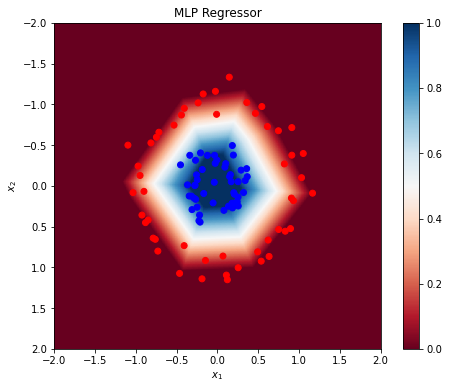

In [121]:
plot_output(x, y, mlp)

**Answer:** The network learned to classify the data better than in 1b), with a lower RMSE, and less points lying in regions of uncertainty. Specifically, more points of class 0 (red) are classified with 100% certainty than before. Class 1 points (blue) are also more contained in the 100% certainty region. This makes sense because the smaller network size reduces the risk of overfitting by limiting the model's complexity and encouraging better generalization.

**d) [1 mark]** Repeat part a) but for the following different number of features: `[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]`.  For each number of features, repeat the process 10 times and compute the average RMSE over those 10 times.  Note that you will have to change the `random_state=0` parameter each time, in both the `MLPRegressor` and the `train_test_split` code.  For example, if you do this in a for loop `for i in range(10):` then you would set `random_state=i`.  

Generate a plot showing how the average RMSE changes as you adjust the number of features.

In [123]:
# varying number of features w/ 1 hidden layer
m_features = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

avg_rmse = [] # empty list for storing average rmse per n

for m in m_features:
    rmse_list = [] # empty list for storing rmse values for 10 iterations per n
    
    for i in range(10):
        # split into training and test data
        x_train, x_test, y_train, y_test = split_data(x, y, i)

        # initialize model
        mlp = model(x_train, y_train, m, None, i)

        # evaluate on test data
        output = mlp.predict(x_test)

        # computing RMSE
        rmse = compute_rmse(y_test, output)
        rmse_list.append(rmse)
        
    avg_rmse.append(np.mean(rmse_list))

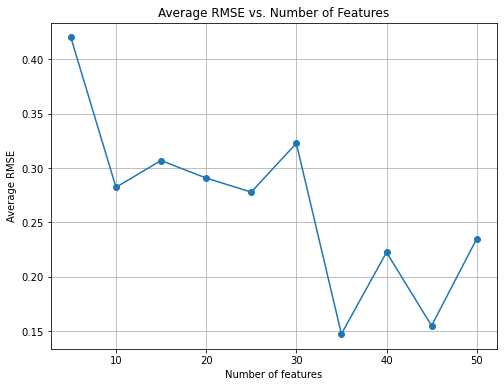

In [124]:
import matplotlib.pyplot as plt

# plot avg rmse vs n features
plt.figure(figsize=(8,6))
plt.plot(m_features, avg_rmse, marker='o', linestyle='-')
plt.title('Average RMSE vs. Number of Features')
plt.xlabel('Number of features')
plt.ylabel('Average RMSE')
plt.grid(True)
plt.show()

**e) [1 mark]** Repeat part d) but add an extra layer of features (i.e. an extra layer inside the network).  Do this by setting `hidden_layer_sizes`.  In the previous example, we set it t `(20,)` to generate one internal layer of 20 features.  To have two internal layers both having 20 features, set it to `(20,20)`.  For this question, use the same number of features in both layers (i.e. try it with `(5,5)`, then `(10,10)`, then `(15, 15)` and so on up to `(50,50)`).  Generate a plot showing how the average RMSE changes as you change these numbers of features.

How does your result in part (e) compare to your result in part (d)?  What does this indicate about how useful the second layer of features is for this task?

In [125]:
# varying number of features w/ n hidden layers
m_features = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

avg_rmse = [] # empty list for storing average rmse per n

for m in m_features:
    rmse_list = [] # empty list for storing rmse values for 10 iterations per n
    
    for i in range(10):
        # split into training and test data
        x_train, x_test, y_train, y_test = split_data(x, y, i)

        # initialize model
        mlp = model(x_train, y_train, m, m, i)

        # evaluate on test data
        output = mlp.predict(x_test)

        # computing RMSE
        rmse = compute_rmse(y_test, output)
        rmse_list.append(rmse)
        
    avg_rmse.append(np.mean(rmse_list))

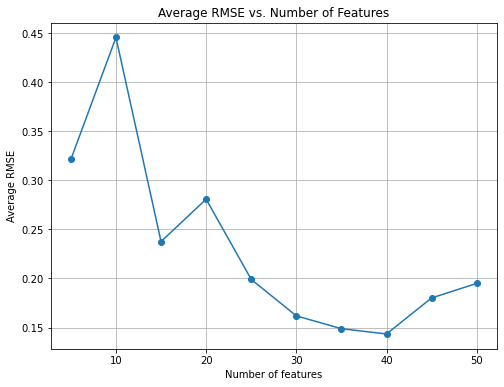

In [126]:
# plot avg rmse vs n features
plt.figure(figsize=(8,6))
plt.plot(m_features, avg_rmse, marker='o', linestyle='-')
plt.title('Average RMSE vs. Number of Features')
plt.xlabel('Number of features')
plt.ylabel('Average RMSE')
plt.grid(True)
plt.show()

**Answer:** This part demonstrates that adding a second hidden layer within the neural network results in faster convergence, stronger performance improvement, and lower RMSE compared to part d), which used a single hidden layer. This indicates the significance of the second layer in capturing complex data patterns and shows that it enhances the model's capability to represent intricate relationships within the dataset.

**f) [1 mark]** Repeat part a) and b) but for this dataset:
```python
x, y = sklearn.datasets.make_circles(n_samples=100, shuffle=True, noise=0.1, random_state=0, factor=0.3)
x[:,0]*=0.1
```
(i.e. exactly the same dataset, but with the `x` values scaled by 0.1)

Report the RMSE and generate the output plot from part b).

Is the accuracy better or worse on this scaled dataset, as compared to the original parts a) and b)?  Why?

In [15]:
# import data
x, y = sklearn.datasets.make_circles(n_samples=100, shuffle=True, noise=0.1, random_state=0, factor=0.3)
x[:,0]*=0.1 # scaling data

# split data
x_train, x_test, y_train, y_test = split_data(x, y)

# initialize and train model
mlp = model(x_train, y_train)

# evaluate model on test set
output = mlp.predict(x_test)

# report rmse
rmse = compute_rmse(y_test, output)
print(f"RMSE = {rmse}")

RMSE = 0.44013499623394015


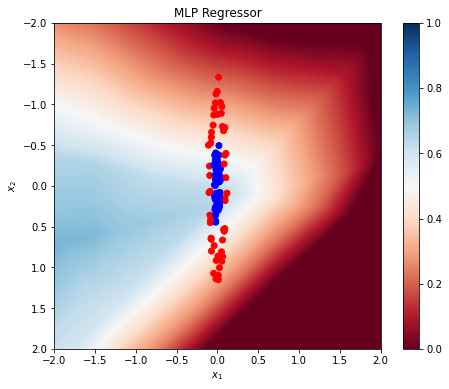

In [26]:
plot_output(x, y, mlp)

**Answer:** In part f), where the dataset x is scaled by a factor of 0.1, the accuracy is worse compared to the original parts a) and b). Scaling the data down by a factor of 0.1 compresses the feature space, making it more challenging for the model to learn the underlying patterns, resulting in a higher RMSE.

**g) [1 mark]** `sklearn` has a tool for automatically rescaling data for you.  You can create a scaler as follows:

```python
scaler = sklearn.preprocessing.StandardScaler().fit(X_train)
```

and then you can transform the `X_train` and `X_test` with `scaler.transform(X_train)` and `scaler.transform(X_test)`.  You can even transform the `pts` used to create the output plot using `scaler.transform(pts)`.

Repeat part f) but use the `scaler` to scale your data before using it.  Report the RMSE and generate the output plot from part b).  How does this accuracy compart to part f) and to the original part a)?

In [4]:
# import data
x, y = sklearn.datasets.make_circles(n_samples=100, shuffle=True, noise=0.1, random_state=0, factor=0.3)

# split data
x_train, x_test, y_train, y_test = split_data(x, y)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)

# transforming input data
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# initialize and train model
mlp = model(x_train, y_train)

# evaluate model on test set
output = mlp.predict(x_test)

# report rmse
rmse = compute_rmse(y_test, output)
print(f"RMSE = {rmse}")

RMSE = 0.0864365625613109


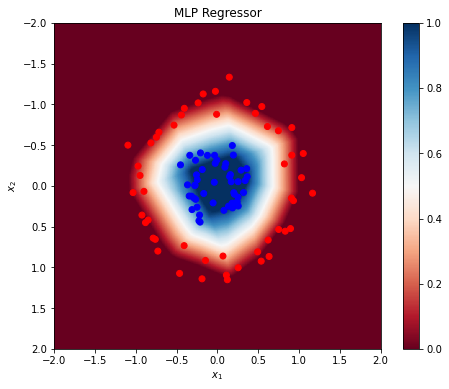

In [7]:
plot_output(x, y, mlp, scaler)

**Answer:** In part g), using sklearn's StandardScaler to rescale the data improves accuracy significantly compared to part f) and even surpasses the accuracy achieved in the original part a). StandardScaler standardizes the features, which mitigates scaling issues, and enables the model to work with consistent and well-scaled data, resulting in a much lower RMSE and higher accuracy.

**h) [1 mark]** Repeat parts a) and b) with the following dataset:

```python
x, y = sklearn.datasets.make_moons(n_samples=500, noise=0.05, random_state=0)
```

Try it both with and without the `scaler` from the part (g), and report the RMSE and generate the output plot both ways.  Should you use the `scaler` for this sort of data?  Why or why not?

In [135]:
# without scaler
x, y = sklearn.datasets.make_moons(n_samples=500, noise=0.05, random_state=0)

# split data
x_train, x_test, y_train, y_test = split_data(x, y)

# initialize and train model
mlp = model(x_train, y_train)

# evaluate model on test set
output = mlp.predict(x_test)

# report rmse
rmse = compute_rmse(y_test, output)
print(f"RMSE = {rmse}")

RMSE = 0.07697270460323195


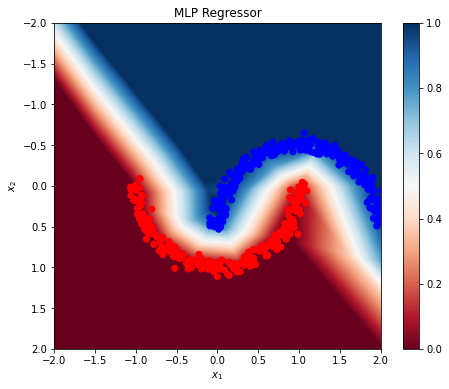

In [136]:
plot_output(x, y, mlp)

In [137]:
# with scaler
x, y = sklearn.datasets.make_moons(n_samples=500, noise=0.05, random_state=0)

# split data
x_train, x_test, y_train, y_test = split_data(x, y)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)

# transforming input data
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# initialize and train model
mlp = model(x_train, y_train)

# evaluate model on test set
output = mlp.predict(x_test)

# report rmse
rmse = compute_rmse(y_test, output)
print(f"RMSE = {rmse}")

RMSE = 0.07063716443041493


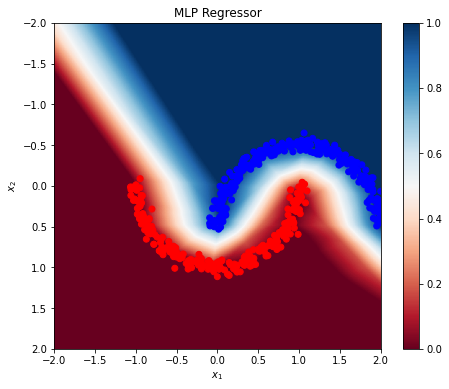

In [138]:
plot_output(x, y, mlp, scaler)

**Answer:** In the case of the dataset generated with make_moons, both using and not using the scaler result in the same RMSE. This is because the dataset's inherent nature allows the neural network to effectively learn without the need for data standardization. Neural networks can handle complex patterns and are relatively insensitive to data scale for this type of dataset, making the use of the scaler unnecessary.

**i) [1 mark]** Repeat parts a) and b) with the following dataset:

```python
x, y = sklearn.datasets.make_blobs(centers=[[-1, -1], [1, 1]], 
                                             cluster_std=[1, 1], 
                                             random_state=0, 
                                             n_samples=200, 
                                             n_features=2)
```

Try it both with and without the `scaler` from part(g), and report the RMSE and generate the output plot both ways.  Note that you will need to adjust the `extent = (-2, 2, -2, 2)` line so that the output plot covers the same range as the training data (try `(-4,4,-4,4)`).  Should you use the `scaler` for this sort of data?  Why or why not?  Why is the error for this dataset much larger than the error for the other datasets we done so far in this assignment?  Could you improve the accuracy by adjusting the network?  If so, what would you change?

In [27]:
# copy of function with modified extent
def plot_output(x, y, model, scaler=None):
    # create figure and axis
    plt.figure(figsize=(8, 6))
    ax = plt.gca()

    # plot labels
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title('MLP Regressor')

    # scatterplot with different colours for two categories
    plt.scatter(x[:,0], x[:,1], c=np.where(y==1, 'blue', 'red'))

    # plot output as image
    extent = (-4, 4, -4, 4)
    G = 200
    XX, YY = np.meshgrid(np.linspace(extent[2],extent[3],G), np.linspace(extent[0],extent[1],G))
    pts = np.vstack([YY.flatten(), XX.flatten()]).T
    
    # scale points if provided scaler
    if scaler is not None:
        pts = scaler.transform(pts)
        
    output_pts = mlp.predict(pts)
    
    im = plt.imshow(output_pts.reshape((G,G)).T, vmin=0, vmax=1, cmap='RdBu',
                    extent=(extent[0], extent[1], extent[3], extent[2]))

    cbar = plt.colorbar(im, ax=ax)

    plt.show()

In [28]:
# without scaler
x, y = sklearn.datasets.make_blobs(centers=[[-1, -1], [1, 1]], 
                                             cluster_std=[1, 1], 
                                             random_state=0, 
                                             n_samples=200, 
                                             n_features=2)

# split data
x_train, x_test, y_train, y_test = split_data(x, y)

# initialize and train model
mlp = model(x_train, y_train)

# evaluate model on test set
output = mlp.predict(x_test)

# report rmse
rmse = compute_rmse(y_test, output)
print(f"RMSE = {rmse}")

RMSE = 0.4652708973765153


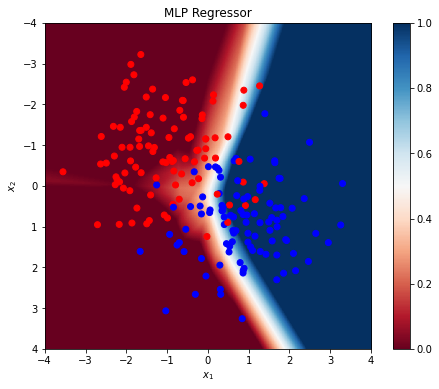

In [29]:
plot_output(x, y, mlp, scaler)

In [30]:
# with scaler
x, y = sklearn.datasets.make_blobs(centers=[[-1, -1], [1, 1]], 
                                             cluster_std=[1, 1], 
                                             random_state=0, 
                                             n_samples=200, 
                                             n_features=2)

# split data
x_train, x_test, y_train, y_test = split_data(x, y)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)

# transforming input data
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# initialize and train model
mlp = model(x_train, y_train)

# evaluate model on test set
output = mlp.predict(x_test)

# report rmse
rmse = compute_rmse(y_test, output)
print(f"RMSE = {rmse}")

RMSE = 0.4061900269118517


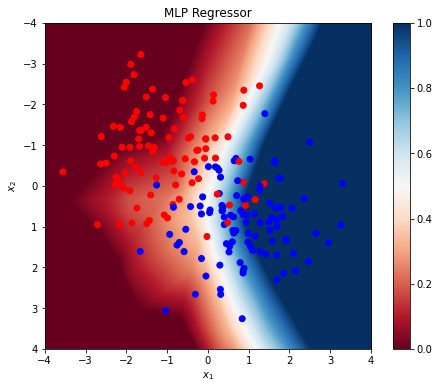

In [31]:
plot_output(x, y, mlp, scaler)

**Answer:** Using the scaler improves the RMSE from 0.465 to 0.406 when working with the dataset in part i). This improvement is because the dataset consists of clusters with some overlap. Scaling the data with the scaler ensures that both clusters have similar scales, aiding the neural network in learning and classifying the data accurately. The higher RMSE in this dataset compared to previous ones is mainly due to cluster overlap, making it more challenging for the model to separate the clusters. To enhance accuracy, we could adjust the network by increasing hidden layers or neurons to capture complex patterns and distinguish overlapping clusters. Experimenting with activation functions, learning rates, and regularization techniques might also help improve model performance.

### Question 2:


**a) [1 mark]** When using an MLP to do classification, we often don't really care what the exact numerical value of the output is: we just want to classify the input data into a particular category.  The `sklearn.neural_network.MLPClassifier` does this for us, training a separate output for each category (one-hot encoding) and then classifying based on which output is largest.  (Note: it also uses a slightly different Loss function, where the goal is to minimize classification error, rather than minimizing ${1 \over 2}(y_{target}-y)^2$).

You can use the `MLPClassifier` with the same parameters as the `MLPRegressor` we used in question 1.

```
mlp = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(20,), # one hidden layer with 20 features 
                                           activation='relu',        # rectified linear
                                           learning_rate_init=1e-2,  # learning rate
                                           max_iter=1000,            # number of iterations
                                           early_stopping=True,      # stop training if validation data gets worse
                                           random_state=0)           # random number seed for initialization
```

Use the MLPClassifier on the `digits` dataset we used in previous assignments.  Split it into 80% training and 20% testing.
```
import sklearn.datasets
digits = sklearn.datasets.load_digits()
```

Train the classifier on the training data (using `mlp.fit`) and test it on the test data (using `mlp.predict`).

Report the accuracy of the classifier, which is computed as the proportion of time that the output is the same as the target output:

```np.mean(output == Y_test)```

Also generate and print the *confusion matrix*, which is a matrix showing how often particular digits are mistaken for other digits:

```
confusion = np.zeros((10,10))
for i in range(len(output)):
    confusion[output[i], Y_test[i]] += 1
print(confusion)
```



In [32]:
import numpy as np
import sklearn.model_selection
import sklearn.neural_network

def split_data(x, y, rand=0):
    # split into training and test data
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
        x, y, test_size=0.2, shuffle=True, random_state=rand
    )
    
    return x_train, x_test, y_train, y_test

def classify(x_train, y_train, m=20, n=None, rand=0):
    # initialize classifier
    if n is not None:
        mlp = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(m,n),    # n hidden layers with m features 
                                                   activation='relu',           # rectified linear
                                                   learning_rate_init=1e-2,     # learning rate
                                                   max_iter=1000,               # number of iterations
                                                   early_stopping=True,         # stop training if validation data gets worse
                                                   random_state=rand)           # random number seed for initialization
    else:        
        mlp = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(m,),     # n hidden layers with m features 
                                                   activation='relu',           # rectified linear
                                                   learning_rate_init=1e-2,     # learning rate
                                                   max_iter=1000,               # number of iterations
                                                   early_stopping=True,         # stop training if validation data gets worse
                                                   random_state=rand)           # random number seed for initialization
    
    # train model
    mlp.fit(x_train, y_train)

    return mlp

def compute_accuracy(predicted, target):
    accuracy = np.mean(output == y_test)*100
    return accuracy

def confusion_matrix(predicted, target):
    confusion = np.zeros((10,10))
    for i in range(len(output)):
        confusion[predicted[i], target[i]] += 1
    
    print('Confusion matrix:')
    print(confusion)

In [33]:
import sklearn.datasets

# import data
digits = sklearn.datasets.load_digits()
x = digits.data
y = digits.target

# split data
x_train, x_test, y_train, y_test = split_data(x, y)

# initialize and train model
mlp = classify(x_train, y_train)

# evaluate model on test set
output = mlp.predict(x_test)

# report accuracy and confusion matrix
print(f'Accuracy = {compute_accuracy(output, y_test):.2f}%')
confusion_matrix(output, y_test)

Accuracy = 96.39%
Confusion matrix:
[[27.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 34.  0.  0.  0.  0.  1.  0.  1.  2.]
 [ 0.  0. 35.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 29.  0.  1.  0.  0.  0.  1.]
 [ 0.  0.  0.  0. 29.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0. 39.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. 43.  0.  1.  0.]
 [ 0.  0.  1.  0.  1.  0.  0. 38.  0.  1.]
 [ 0.  1.  0.  0.  0.  0.  0.  0. 37.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 36.]]


**b) [1 mark]** Repeat the classification in part a) but for different numbers of features (`[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]`).  As with question 1d, repeat the process 10 time for each size, adjusting `random_state` each time.  Generate a plot with the average classification accuracy for these different feature sizes.

In [17]:
# varying number of features w/ n hidden layers
m_features = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

avg_accuracy = [] # empty list for storing average accuracy per n

for m in m_features:
    accuracy_list = [] # empty list for storing accuracy values for 10 iterations per n
    
    for i in range(10):
        # split into training and test data
        x_train, x_test, y_train, y_test = split_data(x, y, i)

        # initialize classifier
        mlp = classify(x_train, y_train, m, m, i)

        # evaluate on test data
        output = mlp.predict(x_test)

        # computing accuracy
        accuracy = compute_accuracy(output, y_test)
        accuracy_list.append(accuracy)
        
    avg_accuracy.append(np.mean(accuracy_list))

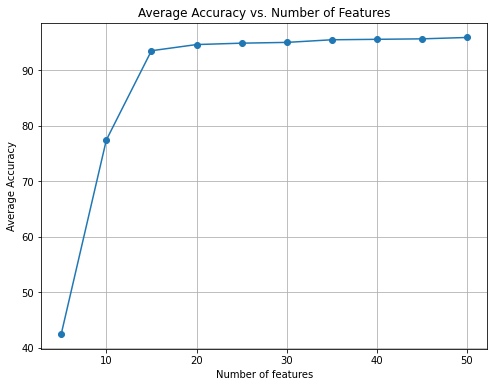

In [20]:
import matplotlib.pyplot as plt

# plot avg accuracy vs n features
plt.figure(figsize=(8,6))
plt.plot(m_features, avg_accuracy, marker='o', linestyle='-')
plt.title('Average Accuracy vs. Number of Features')
plt.xlabel('Number of features')
plt.ylabel('Average Accuracy')
plt.grid(True)
plt.show()

**c) [1 mark]** What happens if you set `hidden_layer_sizes=()`?  This should not generate any new features at all.  How accurate is the system now?  Since there are no new features to learn, what is the MLP doing in this case? (Hint: this is now the same thing as an algorithm we have worked with earlier in the course)

In [34]:
# initialize classifier
mlp = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(),      # n hidden layers with m features 
                                           activation='relu',          # rectified linear
                                           learning_rate_init=1e-2,    # learning rate
                                           max_iter=1000,              # number of iterations
                                           early_stopping=True,        # stop training if validation data gets worse
                                           random_state=0)             # random number seed for initialization

# split data
x_train, x_test, y_train, y_test = split_data(x, y)

# fit and transform
mlp.fit(x_train, y_train)
output = mlp.predict(x_test)

# report accuracy and confusion matrix
print(f'Accuracy = {compute_accuracy(output, y_test):.2f}%')
confusion_matrix(output, y_test)

Accuracy = 96.39%
Confusion matrix:
[[27.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 33.  0.  0.  0.  0.  1.  0.  2.  0.]
 [ 0.  0. 33.  1.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  2. 28.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 30.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0. 38.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. 43.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 38.  0.  0.]
 [ 0.  2.  1.  0.  0.  0.  0.  0. 36.  0.]
 [ 0.  0.  0.  0.  0.  2.  0.  0.  0. 41.]]


**Answer:** Setting hidden_layer_sizes=() effectively turns the MLPClassifier into a linear classifier. The accuracy does not change significantly, but the confusion matrix results changes slightly because the decision boundary differs from a fully linear classifier, even though the dataset is not highly complex and still yields reasonable results.

**d) [2 marks]** Using the following dataset, do the best job you can at building a classifier and testing it.

```python
digits = sklearn.datasets.load_digits()
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    digits.data, digits.target, test_size=0.2, shuffle=True, random_state=0,
)
```

You can use any of the supervised learning models from the assignments so far: the perceptron (`sklearn.linear_model.Perceptron`), regression (`sklearn.linear_model.Ridge`), linear SVM (`sklearn.svm.LinearSVC`), kernel-based SVM (`sklearn.svm.SVC`), and the MLPClassifier (`sklearn.neural_network.MLPClassifier`). Make sure to develop your models only using the training data (perhaps split into training and validation), and only once you have chosen your best model should you test it on the testing data.  You are trying to get the best accuracy (`np.mean(output == Y_test)`) possible.

In [35]:
# import data
import sklearn.datasets

digits = sklearn.datasets.load_digits()
x = digits.data
y = digits.target

# split into training and test data
x_train, x_test, y_train, y_test = split_data(x, y)

In [42]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV

# parameter grid for grid search
param_grid = {
    'penalty': ['l1', 'l2'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'max_iter': [100, 500, 1000],
}

# initialize perceptron
perceptron = Perceptron()

# grid search
grid_search = GridSearchCV(perceptron, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(x_train, y_train)

# get the best parameters and accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print(f"Best Accuracy: {(best_accuracy*100):.2f}%")

Best Parameters: {'alpha': 0.0001, 'max_iter': 100, 'penalty': 'l1'}
Best Accuracy: 93.39%


In [38]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# List of kernels to compare
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# parameter grid for grid search
param_grid = {
    'kernel': kernels,
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10, 100],
}

# initialize svm
svm = SVC()

# grid search
grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(x_train, y_train)

# get the best parameters and accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print(f"Best Accuracy: {(best_accuracy*100):.2f}%")

Best Parameters: {'C': 0.01, 'gamma': 0.01, 'kernel': 'poly'}
Accuracy: 98.747%


In [40]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV

# parameter grid for grid search
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'normalize': [True, False],
}

# initialize ridge classifier
ridge = RidgeClassifier()

# grid search
grid_search = GridSearchCV(ridge, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(x_train, y_train)

# get the best parameters and accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print(f"Best Accuracy: {(best_accuracy*100):.2f}%")

Best Parameters: {'alpha': 0.1, 'normalize': True}
Best Accuracy: 94.09%


In [41]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# parameter grid for grid search
param_grid = {
    'hidden_layer_sizes': [(20,), (50,), (100,), (20, 20), (50, 50), (100, 100)],
    'activation': ['logistic', 'tanh', 'relu'],
    'learning_rate_init': [0.001, 0.01, 0.1, 1],
    'max_iter': [500, 1000, 1500],
}

# initialize mlp classifier
mlp_classifier = MLPClassifier()

# grid search
grid_search = GridSearchCV(mlp_classifier, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(x_train, y_train)

# get the best parameters and accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print(f"Best Accuracy: {(best_accuracy*100):.2f}%")

Best Parameters: {'activation': 'logistic', 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01, 'max_iter': 500}
Best Accuracy: 98.26%


**Answer:** Following extensive parameter tuning for each model, the polynomial SVM appears to be the top-performing model, achieving an accuracy of 98.26%.

In [43]:
# training svm with optimized c and gamma values
svm = SVC(kernel='poly', gamma=0.01, C=0.01)
svm.fit(x_train, y_train)
output = svm.predict(x_test)

print(f'Accuracy = {compute_accuracy(output, y_test):.2f}%')

Accuracy = 98.61%


### Question 3:

**[1 mark]** Describe what you would like to do for your final project.  In particular, tell me what dataset you want to analyse (either one you've made up, or one found online in places like https://www.kaggle.com/datasets or one from the various papers we've discussed in class).  Given that dataset, describe what algorithms you want to try on that dataset.  You should include both very simple algorithms and more complex ones.  Indicate what parameters of those algorithms you would adjust and what you would measure as you are adjusting those parameters.

Even though the final project can be done in groups of 2, each member of the group should write their answer this question separately.

**Answer:** For our final project, my teammate and I will analyze a stroke prediction dataset available on Kaggle (https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset). This dataset presents a binary classification challenge, distinguishing between stroke events and non-events, with 11 health-related features such as age, BMI, and smoking status. To tackle this task, we plan to explore a range of algorithms, including regression, Support Vector Machines (SVMs), and Multi-Layer Perceptrons (MLP).

We will begin with regression models, as they offer simplicity and interpretability. Adjusting parameters like learning rate (lambda) and standard deviation (sigma), we will gauge their effectiveness in fitting the data and measuring prediction errors. Next, we'll explore to SVMs, known for their ability to handle complex classification tasks. We will experiment with different kernels and tune hyperparameters like cost and gamma to determine if a more sophisticated model is warranted. Finally, we'll explore MLPs, a class of neural networks, as they excel at capturing intricate data relationships. We will vary the number of features per layer and the depth of the network while using RMSE as an evaluation metric to enhance model accuracy. Our goal is to identify the best algorithm and parameter settings to improve our understanding of stroke prediction and provide valuable insights into this critical health issue.